### 1.0 Bibliotecas

In [245]:
import pandas              as pd
import numpy               as np
import matplotlib.pyplot   as plt
import seaborn             as sn
import scikitplot          as skplt
import scikitplot.plotters as skplts


from sklearn.model_selection import train_test_split
from sklearn.svm             import SVC
from sklearn.metrics         import accuracy_score

### 2.0 Leitura e importação de registros

In [213]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
df = pd.read_csv(uri)

### 3.0 Tratamento de dados

In [214]:
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [215]:
df.tail()

,Unnamed: 0,mileage_per_year,model_year,price,sold
9995,9995,15572,2006,97112.86,no
9996,9996,13246,2002,107424.63,yes
9997,9997,13018,2014,93856.99,no
9998,9998,10464,2011,51250.57,yes
9999,9999,12362,1999,87945.73,no


In [216]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [217]:
df.isnull().sum()

mileage_per_year    0
model_year          0
price               0
sold                0
dtype: int64

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mileage_per_year  10000 non-null  int64  
 1   model_year        10000 non-null  int64  
 2   price             10000 non-null  float64
 3   sold              10000 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 312.6+ KB


In [219]:
df['model_year'] = df['model_year'].astype('object')

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mileage_per_year  10000 non-null  int64  
 1   model_year        10000 non-null  object 
 2   price             10000 non-null  float64
 3   sold              10000 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 312.6+ KB


In [221]:
df.describe()

,mileage_per_year,price
count,10000.000000,10000.000000
mean,14183.391200,64842.373698
std,5008.571422,25250.592393
min,363.000000,-840.360000
25%,10474.750000,44796.375000
50%,13418.500000,65225.685000
75%,17176.750000,85111.237500
max,39572.000000,118929.720000


In [222]:
df.loc[df['price'] < 0]

,mileage_per_year,model_year,price,sold
4200,17000,1998,-270.77,yes
4796,13277,1998,-840.36,yes


In [223]:
df.loc[df['price'] < 0]

,mileage_per_year,model_year,price,sold
4200,17000,1998,-270.77,yes
4796,13277,1998,-840.36,yes


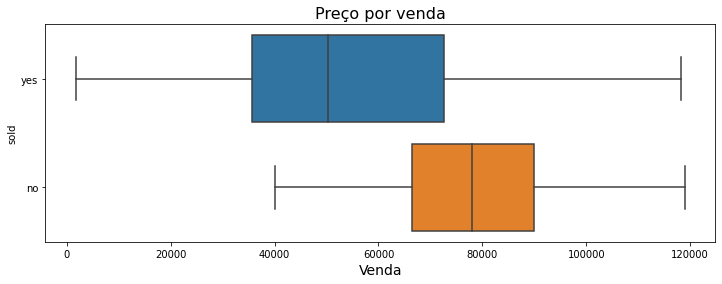

In [224]:
ax = sn.boxplot(x = 'price', y ='sold', data = df.loc[df['price'] > 0], orient='h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Preço por venda', fontsize=16)
ax.set_xlabel('Preço', fontsize=14)
ax.set_xlabel('Venda', fontsize=14)
ax

In [225]:
df.loc[(df['price'] > 0) & (df['model_year'] == 1998) & (df['mileage_per_year'] <= 17000) & (df['mileage_per_year'] >= 13277) ]['price'].describe()

count       240.000000
mean      59535.084542
std       27181.482105
min        4804.110000
25%       38810.250000
50%       60850.430000
75%       81683.477500
max      114630.630000
Name: price, dtype: float64

In [226]:
mediana = df.loc[(df['price'] > 0) & (df['model_year'] == 1998)]['price'].mean()
print(mediana)

57983.31780971271


In [227]:
df['price'] = df['price'].replace([-270.77,mediana])
df['price'] = df['price'].replace([-840.360000,mediana])

### 4.0 Visualização de dados

In [228]:
df.describe()

,mileage_per_year,price
count,10000.000000,10000.000000
mean,14183.391200,64856.228889
std,5008.571422,25234.536031
min,363.000000,1757.970000
25%,10474.750000,44808.152500
50%,13418.500000,65227.910000
75%,17176.750000,85111.237500
max,39572.000000,118929.720000


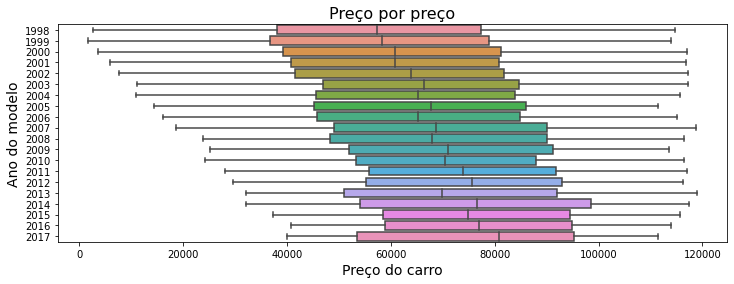

In [229]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sn.boxplot(data=df, x='price', y='model_year', orient='h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Preço por preço', fontsize=16)
ax.set_xlabel('Preço do carro', fontsize=14)
ax.set_ylabel('Ano do modelo', fontsize=14)
ax

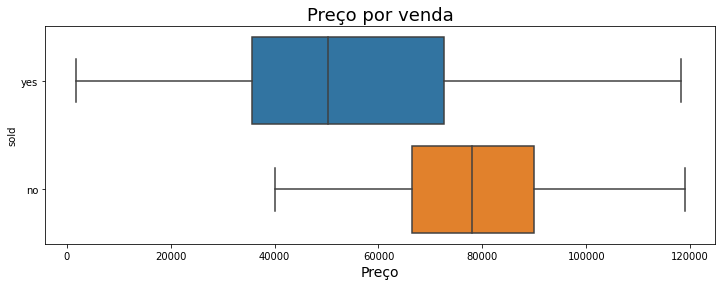

In [230]:
ax = sn.boxplot(x = 'price', y ='sold', data = df, orient='h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Preço por venda', fontsize=18)
ax.set_xlabel('Preço', fontsize=14)
ax.set_xlabel('Preço', fontsize=14)
ax

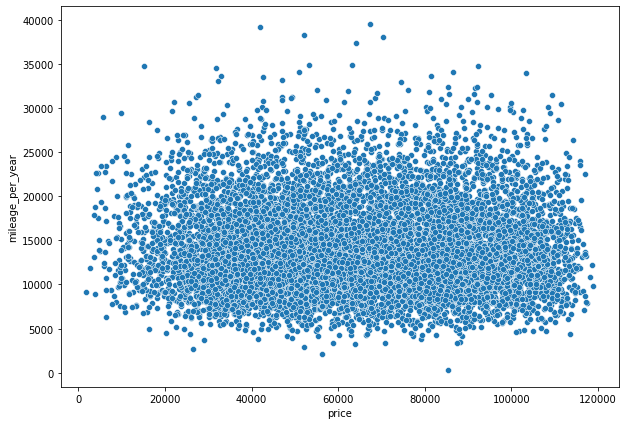

In [231]:
fig, ax = plt.subplots(figsize=(10, 7))
sn.scatterplot(data=df, x="price", y="mileage_per_year", palette="deep")

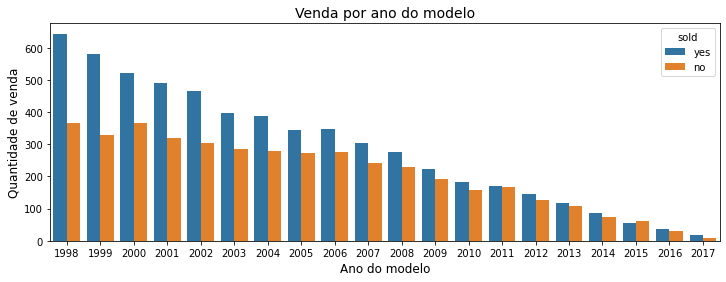

In [232]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sn.countplot(x="model_year", hue='sold',data=df)
ax.figure.set_size_inches(12, 4)
ax.set_title('Venda por ano do modelo', fontsize=14)
ax.set_xlabel('Ano do modelo', fontsize=12)
ax.set_ylabel('Quantidade de venda', fontsize=12)
ax

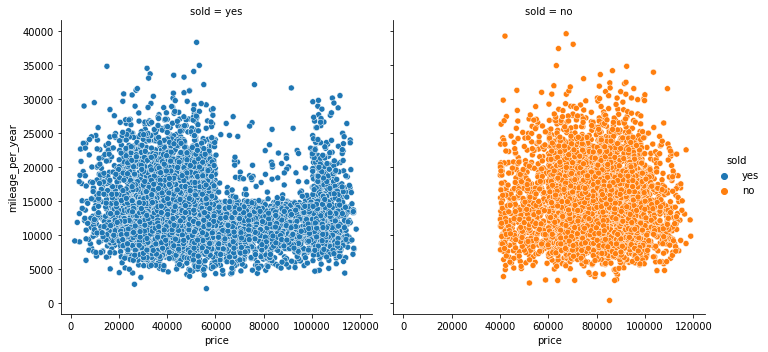

In [233]:
sn.relplot(x = 'price', y = 'mileage_per_year', data=df, col = 'sold', hue='sold')

In [234]:
df['sold'] = df['sold'].astype('category').cat.codes.astype('int64')

In [235]:
df['old_year'] = df['model_year'].max() - df['model_year']

In [236]:
df.head()

,mileage_per_year,model_year,price,sold,old_year
0,21801,2000,30941.02,1,17
1,7843,1998,40557.96,1,19
2,7109,2006,89627.50,0,11
3,26823,2015,95276.14,0,2
4,7935,2014,117384.68,1,3


### 5.0 Separação dos dados de treino e teste

In [237]:
x = df[['mileage_per_year','price','old_year']]
y = df['sold']
print(x.shape, y.shape)

(10000, 3) (10000,)


In [238]:
SEED = 42
np.random.seed(SEED)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25)
print(x_treino.shape, x_teste.shape)
print(y_treino.shape, y_teste.shape)

(7500, 3) (2500, 3)
(7500,) (2500,)


### 6.0 Treinamento e teste 

In [239]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5)
model.fit(x_treino, y_treino)
previsoes = model.predict(x_teste)

### 7.0 Métricas de desempenho

In [240]:
acuracia = accuracy_score(y_teste, previsoes)
print(f"Acurácia do modelo: {acuracia*100} %")

Acurácia do modelo: 77.32 %


In [241]:
!pip install scikit-plot

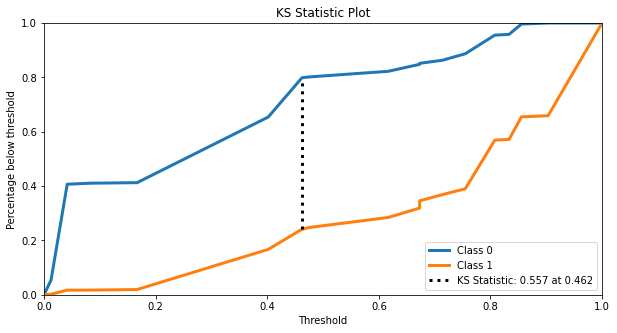

In [246]:
target_proba = model.predict_proba(x_teste)
skplt.metrics.plot_ks_statistic(y_teste, target_proba, figsize=(10,5))
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


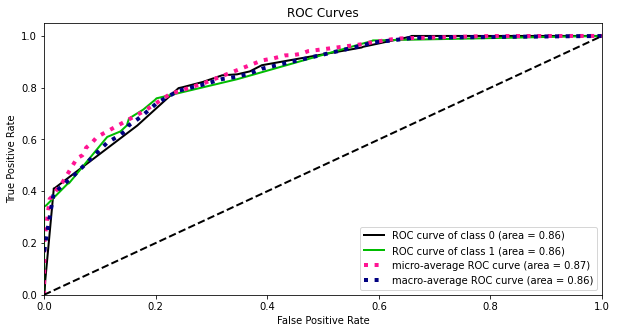

In [247]:
skplts.plot_roc_curve(y_teste, target_proba, figsize=(10,5))
plt.show()